# 🌍 Nomadismo Digital: Análisis de Eficiencia y Coste de Vida Global

### 🏦 Autores: Daniela Aguirre, Alejandro Balaguer, Juan F. Cía

---

### 1. Contexto del Proyecto
En un mundo post-pandemia, la oficina es cualquier lugar con Wi-Fi. Sin embargo, **no todos los destinos son iguales**. 
Este proyecto analiza 4.742 ciudades para responder a una pregunta estratégica:
> **¿Dónde se maximiza la calidad de vida y la infraestructura tecnológica al menor coste posible?**

### 2. Objetivos
1.  Identificar **"Joyas Ocultas"**: Ciudades con internet de alta velocidad a precios low-cost.
2.  Desmitificar la relación entre **Impuestos y Felicidad**.
3.  Analizar el **Impacto Ético** (Gentrificación) en las economías locales.

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración estética
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

# RUTAS DE CARGA
# Usamos r"" para que Python interprete bien las barras invertidas de Windows
path_absoluto = r"C:\Users\Usuario\Documents\DS_TheBridge_Septimbre25_Online\Proyecyo_EDA_I_Pruebas\EDA-Nomadismo-Digital\src\notebooks\data\MASTER_DATASET_EDA_V2.csv"

try:
    df = pd.read_csv(path_absoluto)
    print(f"✅ Dataset cargado correctamente desde ruta local.")
    print(f"📊 Dimensiones: {df.shape[0]} ciudades x {df.shape[1]} variables.")
except FileNotFoundError:
    print("❌ Error: No se encuentra el archivo en la ruta especificada.")
    print("Intenta usar una ruta relativa si has movido el proyecto.")

# Mostramos las métricas financieras clave calculadas
print("\n--- Muestra de Variables Clave (Calculadas en ETL) ---")
display(df[['city_name', 'country_name', 'nomad_housing_cost', 'housing_salary_ratio', 'local_purchasing_power']].head(3))

✅ Dataset cargado correctamente desde ruta local.
📊 Dimensiones: 4740 ciudades x 84 variables.

--- Muestra de Variables Clave (Calculadas en ETL) ---


,city_name,country_name,nomad_housing_cost,housing_salary_ratio,local_purchasing_power
0,Seoul,South Korea,650.030,24.168098,2.208426
1,Shanghai,China,830.905,58.519794,1.151459
2,Guangzhou,China,425.365,35.105391,1.646920


### 3. Estructura del Proyecto y Arquitectura de Datos
Este notebook presenta los resultados ejecutivos. Para profundizar en el código técnico o reproducir los pasos intermedios, el proyecto se organiza así:

#### 📂 Notebooks de Análisis (Pipeline)
El flujo de trabajo se divide en 4 fases secuenciales:
1.  🧹 **Limpieza y ETL:** `src/notebooks/01_Limpieza_ETL.ipynb` (Normalización de nombres, gestión de nulos y cruce de fuentes).
2.  📊 **Análisis Univariante:** `src/notebooks/02_Analisis_Univariante.ipynb` (Distribuciones y detección de outliers).
3.  🔗 **Análisis Bivariante:** `src/notebooks/03_Analisis_Bivariante.ipynb` (Correlaciones e hipótesis iniciales).
4.  🌍 **Análisis Multivariante:** `src/notebooks/04_Analisis_Multivariante.ipynb` (Clustering y segmentación de mercado).

#### 💾 Datasets Utilizados (`src/data/`)
Hemos trabajado con una arquitectura de datos en tres capas:

* **1. Fuentes Originales (Raw Data):**
    * `cost-of-living.csv`: Datos base de precios de Kaggle.
    * `digital-nomad-index-2024.csv`: Datos de *MovingTo* (Visados y Seguridad).
    * `circleloop-index.csv`: Datos de *CircleLoop* (Velocidad de Internet y Búsquedas).
    * `cost-of-living-vars-map.csv`: Diccionario de variables auxiliar.

* **2. Datos Procesados (Intermedios):**
    * `cost-of-living-clean.csv`: Precios limpios sin outliers extremos (ej: Irán).
    * `digital-nomad-index-movingto-clean-v2.csv`: Normalización de nombres de países.
    * `digital-nomad-index-cicleloop-clean.csv`: Limpieza de formatos de moneda.

* **3. Golden Record (Dataset Final):**
    * 🏆 **`MASTER_DATASET_EDA_V2.csv`**: El dataset unificado que alimenta este análisis. Contiene las 4.742 ciudades cruzadas con sus métricas de internet, seguridad y las nuevas variables financieras calculadas (`local_purchasing_power`, `housing_salary_ratio`).

### 4. Análisis de Mercado: ¿Cuánto cuesta ser Nómada?
Antes de buscar relaciones, analizamos la distribución de costes para entender el terreno de juego.

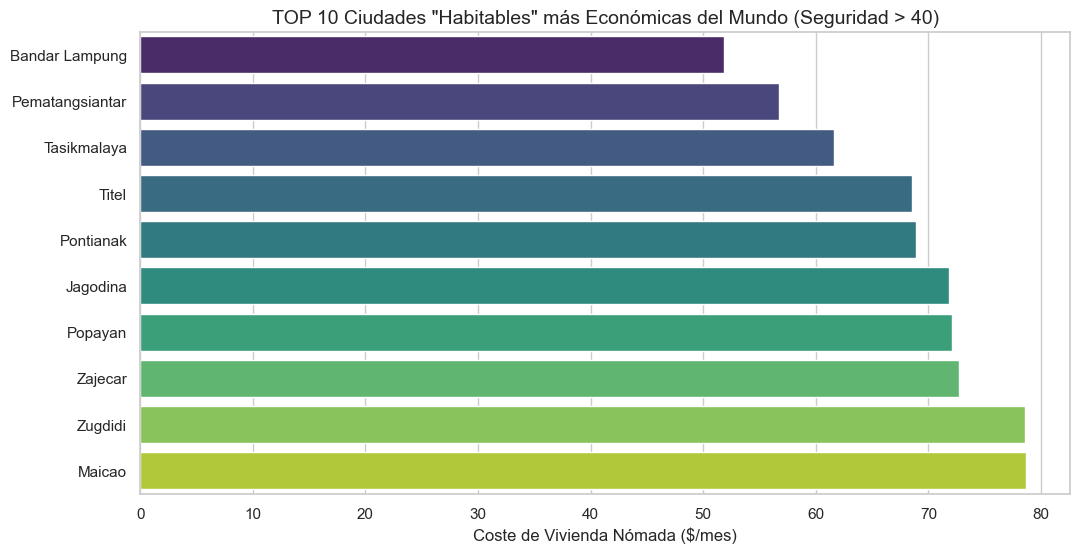

In [3]:
# Gráfica: Top 10 Ciudades más Baratas (con filtro de seguridad mínima > 40)
# Filtramos ciudades inseguras para que el ranking sea una recomendación realista
safe_cheap = df[df['safety'] > 40].sort_values('nomad_housing_cost', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='nomad_housing_cost', y='city_name', data=safe_cheap, palette='viridis', hue='city_name', legend=False)
plt.title('TOP 10 Ciudades "Habitables" más Económicas del Mundo (Seguridad > 40)', fontsize=14)
plt.xlabel('Coste de Vivienda Nómada ($/mes)')
plt.ylabel('')
plt.show()

### 5. La Búsqueda de la Eficiencia (Internet vs. Coste)
Cruzamos la velocidad de internet con el coste de vida.
Aquí descubrimos las **"Joyas Ocultas"**: Ciudades que rompen la regla de "lo barato sale caro".

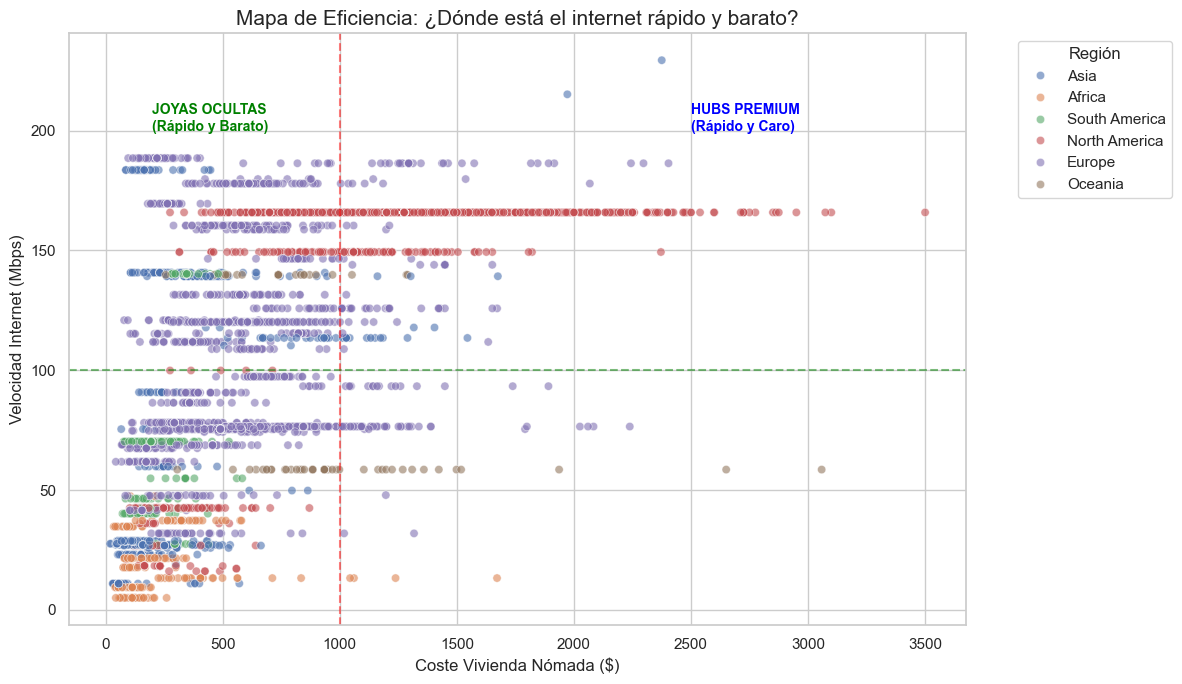

In [4]:
# Scatter Plot: Internet vs Coste
plt.figure(figsize=(12, 7))

# Definimos cuadrantes estratégicos
plt.axvline(x=1000, color='red', linestyle='--', alpha=0.5) # Límite barato
plt.axhline(y=100, color='green', linestyle='--', alpha=0.5) # Límite rápido

sns.scatterplot(
    data=df, 
    x='nomad_housing_cost', 
    y='broadband_speed_mbps', 
    hue='continent', 
    alpha=0.6,
    palette='deep'
)

plt.title('Mapa de Eficiencia: ¿Dónde está el internet rápido y barato?', fontsize=15)
plt.xlabel('Coste Vivienda Nómada ($)')
plt.ylabel('Velocidad Internet (Mbps)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Anotaciones visuales
plt.text(200, 200, 'JOYAS OCULTAS\n(Rápido y Barato)', color='green', fontweight='bold', fontsize=10)
plt.text(2500, 200, 'HUBS PREMIUM\n(Rápido y Caro)', color='blue', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### 6. Segmentación Global (Multivariante)
Para entender el mercado, segmentamos las ciudades en 3 categorías basándonos en reglas de negocio.
El tamaño de la burbuja representa la **Calidad Global (Nomad Score)**.

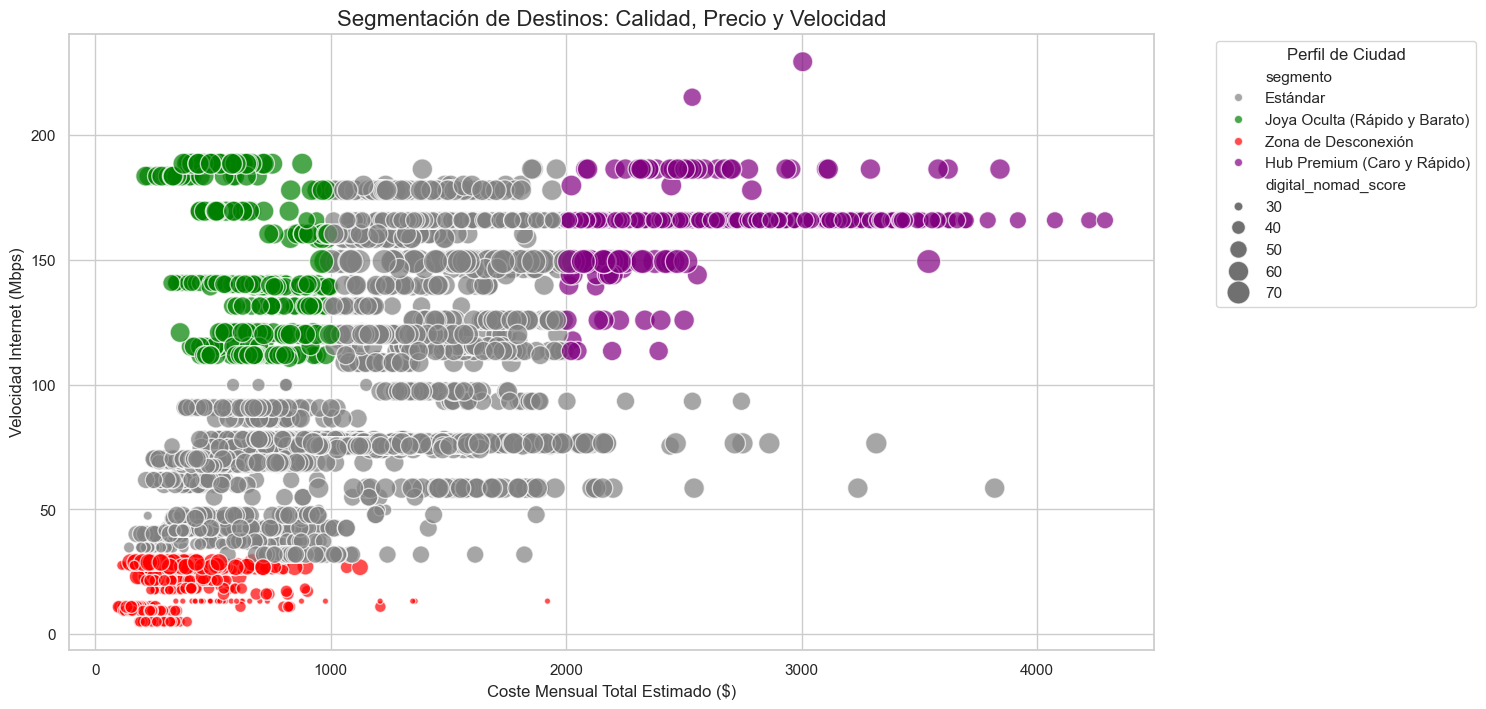

In [5]:
# 1. Creamos la segmentación para la visualización
def clasificar_ciudad(row):
    internet = row['broadband_speed_mbps']
    coste = row['monthly_nomad_cost']
    
    if internet > 100 and coste < 1000:
        return 'Joya Oculta (Rápido y Barato)'
    elif internet > 100 and coste >= 2000:
        return 'Hub Premium (Caro y Rápido)'
    elif internet < 30:
        return 'Zona de Desconexión'
    else:
        return 'Estándar'

# Usamos .copy() para evitar warnings
df_viz = df.copy()
df_viz['segmento'] = df_viz.apply(clasificar_ciudad, axis=1)

# 2. Bubble Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_viz.dropna(subset=['segmento']),
    x='monthly_nomad_cost',
    y='broadband_speed_mbps',
    size='digital_nomad_score',  # Tamaño = Calidad
    hue='segmento',              # Color = Nuestro Segmento
    sizes=(20, 300),
    alpha=0.7,
    palette={'Joya Oculta (Rápido y Barato)': 'green', 
             'Hub Premium (Caro y Rápido)': 'purple', 
             'Zona de Desconexión': 'red',
             'Estándar': 'gray'}
)

plt.title('Segmentación de Destinos: Calidad, Precio y Velocidad', fontsize=16)
plt.xlabel('Coste Mensual Total Estimado ($)')
plt.ylabel('Velocidad Internet (Mbps)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Perfil de Ciudad')
plt.show()

### 💡 Nota Metodológica: El "Ratio de Esfuerzo Local"
Para el análisis ético, hemos calculado una métrica personalizada llamada **`housing_salary_ratio`**:

$$\text{Housing Salary Ratio} = \left( \frac{\text{Coste Vivienda Nómada}}{\text{Salario Neto Local Medio}} \right) \times 100$$

* **Interpretación:** Indica qué porcentaje de un salario local se necesitaría para pagar el alquiler de un nómada.
* **Umbral de Riesgo:** Si el valor es **> 100%**, significa que un local necesita más de un sueldo entero solo para pagar el alquiler, indicando un alto riesgo de gentrificación.

### 7. Análisis de Riesgo Ético: Gentrificación
Gracias a las métricas financieras calculadas, detectamos ciudades donde el alquiler nómada asfixia a la economía local.
* **Métrica:** `housing_salary_ratio` (% del sueldo local necesario para pagar un alquiler nómada).

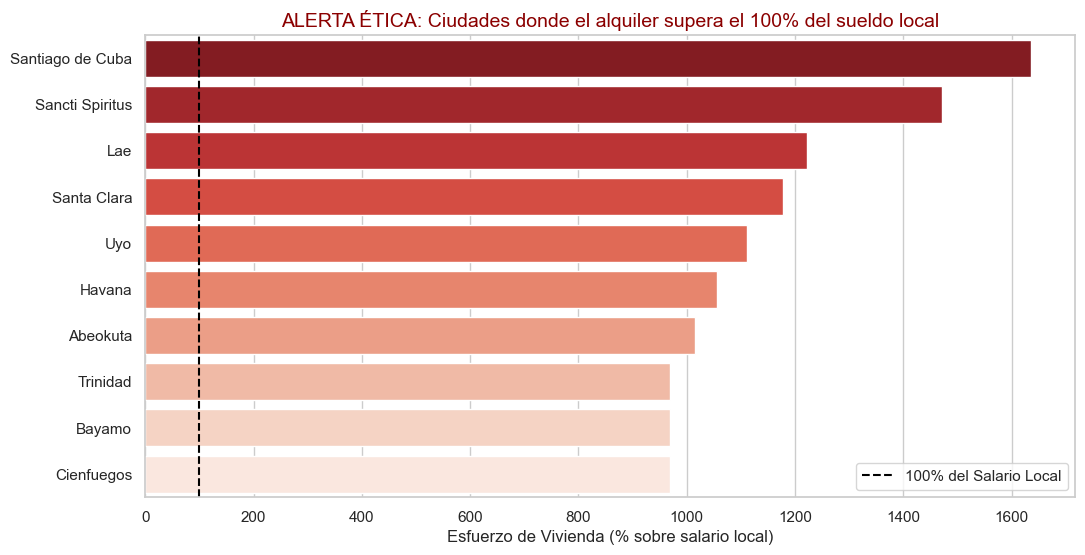

In [6]:
# Filtramos ciudades con datos extremos de desigualdad
top_stress = df[df['housing_salary_ratio'] > 100].sort_values('housing_salary_ratio', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='housing_salary_ratio', y='city_name', data=top_stress, palette='Reds_r', hue='city_name', legend=False)
plt.axvline(x=100, color='black', linestyle='--', label='100% del Salario Local')
plt.title('ALERTA ÉTICA: Ciudades donde el alquiler supera el 100% del sueldo local', fontsize=14, color='darkred')
plt.xlabel('Esfuerzo de Vivienda (% sobre salario local)')
plt.ylabel('')
plt.legend()
plt.show()

### 8. Conclusiones y Estrategia

Tras analizar 4.742 ciudades, respondemos a las hipótesis iniciales:

1.  **¿Dónde ir? (Eficiencia):** Recomendamos el segmento de **"Joyas Ocultas"** (1.242 ciudades detectadas), principalmente en **Europa del Este (Rumanía)** y **Sudeste Asiático (Tailandia)**. Ofrecen infraestructura de primer mundo a costes en desarrollo.
2.  **¿Dónde invertir? (Calidad):** Los **"Hubs Premium"** (Suiza, Dinamarca) son caros, pero la correlación de datos demuestra que se paga por **Seguridad y Felicidad**, no por mejor internet.
3.  **¿Qué evitar? (Ética):** Desaconsejamos destinos como **La Habana** o **Lagos**, donde nuestra presencia genera una inflación inmobiliaria insostenible para los locales (>1000% del salario medio).

---
*Fin del Análisis.*